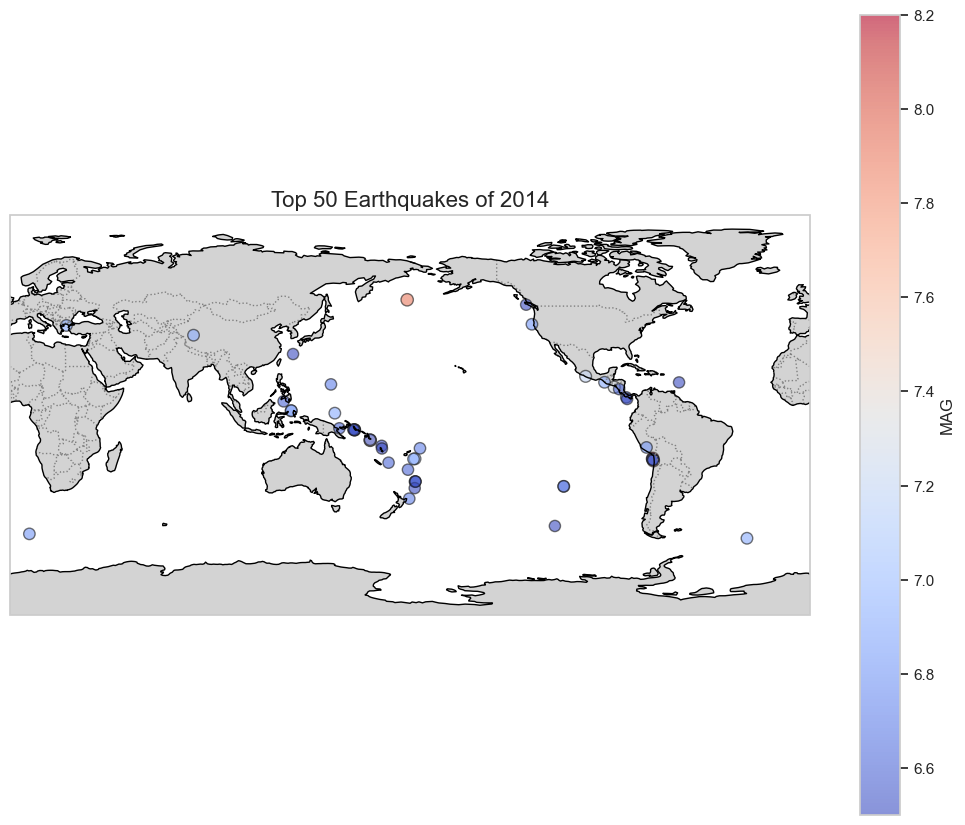

In [123]:


import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载CSV数据
data = pd.read_csv('usgs_earthquakes.csv')

# 确保日期列被正确解析为日期格式
data['time'] = pd.to_datetime(data['time'])

# 筛选出2014年的地震数据
data_2014 = data[data['time'].dt.year == 2014]

# 清理数据：去除缺失震级、纬度和经度的行
data_clean = data_2014.dropna(subset=['mag', 'latitude', 'longitude'])

# 按震级排序，选择震级前50大
top_50_earthquakes = data_clean.nlargest(50, 'mag')


# 使用 Cartopy 创建地图，设置投影方式
fig = plt.figure(figsize=(10, 8)) 
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree(central_longitude=180))  # 创建坐标轴并设置为 PlateCarree 投影

# 添加地理特征

ax.set_extent([-180, 180, -90, 90])  # 设置全球地图显示范围
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')  # 添加国家边界
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # 添加陆地

ax.add_feature(cfeature.COASTLINE)  # 添加海岸线



# 绘制震中位置，震级通过点的大小和颜色表示
sc = ax.scatter(top_50_earthquakes['longitude'], top_50_earthquakes['latitude'],
                c=top_50_earthquakes['mag'], s=top_50_earthquakes['mag'] * 10,  # 震级与点的大小成正比
                cmap='coolwarm', edgecolors='k', alpha=0.6, transform=ccrs.PlateCarree())

# 添加颜色条
plt.colorbar(sc, ax=ax, label='MAG')

# 添加标题
plt.title('Top 50 Earthquakes of 2014', fontsize=16)

# 显示地图
plt.show()

In [101]:

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 1. 加载NetCDF数据集
dataset = xr.open_dataset('data\oco2_GEOS_L3CO2_month_201510_B10206Ar.nc4') 
dataset


# 检查 XCO2 变量的属性
variable_name = "XCO2"  # 替换为实际变量名
if variable_name in dataset:
    print(f"Variable: {variable_name}")
    print(dataset[variable_name].attrs)  # 打印变量的属性，包括单位
else:
    print(f"{variable_name} not found in dataset")

Variable: XCO2
{'units': 'mol CO2/mol dry', 'long_name': 'Assimilated dry-air column average CO2 daily mean', 'cell_methods': 'time: mean'}


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12012\1960650696.py:8: SyntaxWarning: invalid escape sequence '\o'
  dataset = xr.open_dataset('data\oco2_GEOS_L3CO2_month_201510_B10206Ar.nc4')


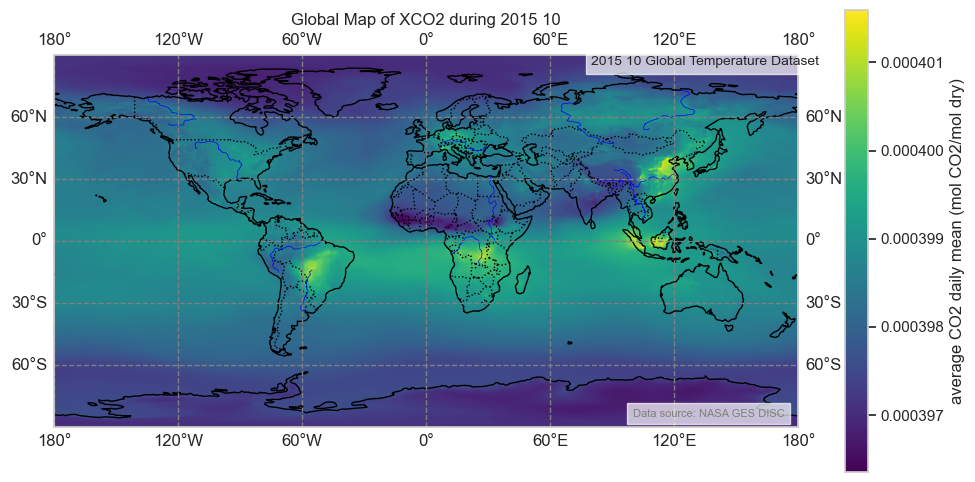

In [127]:

variable = 'XCO2'  # 替换为数据集中的实际变量名
data_var = dataset[variable]
# 全球地图
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
data_var.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"label": "average CO2 daily mean (mol CO2/mol dry)"})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)  # 添加河流

ax.set_title("Global Map of XCO2 during 2015 10")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.gridlines(draw_labels=True, linestyle='--', color='gray')
plt.text(80, 85, "2015 10 Global Temperature Dataset", transform=ccrs.PlateCarree(), fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.text(100, -85, "Data source: NASA GES DISC", fontsize=8, transform=ccrs.PlateCarree(), color="gray", bbox=dict(facecolor='white', alpha=0.7))
plt.show()


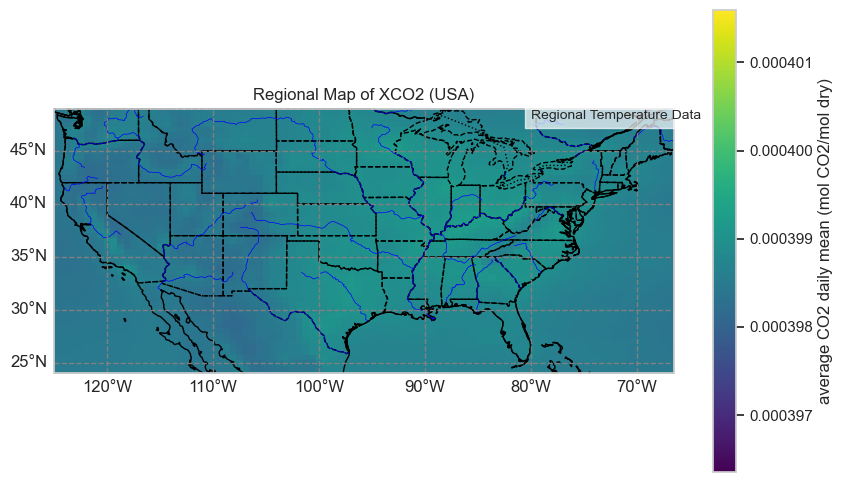

In [125]:
# 区域地图（例如：美国区域）
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
extent = [-125, -66.5, 24, 49]  # 区域范围：美国
ax.set_extent(extent, crs=ccrs.PlateCarree())
data_var.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"label": "average CO2 daily mean (mol CO2/mol dry)"})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='--')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.5)  # 添加河流
ax.set_title("Regional Map of XCO2 (USA)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# 添加网格线
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray')
gl.top_labels = False  # 不显示顶部标签
gl.right_labels = False  # 不显示右侧标签

plt.text(-80, 48, "Regional Temperature Data", fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.show()